# Feedforward Neural Network
## Generate sequences for...
The logistic recursive sequence is defined as

![title](pic1.png)

### Exercise

Do this in your own coding environment. Generate and plot the first 50 elements of this sequence when the following values are used:
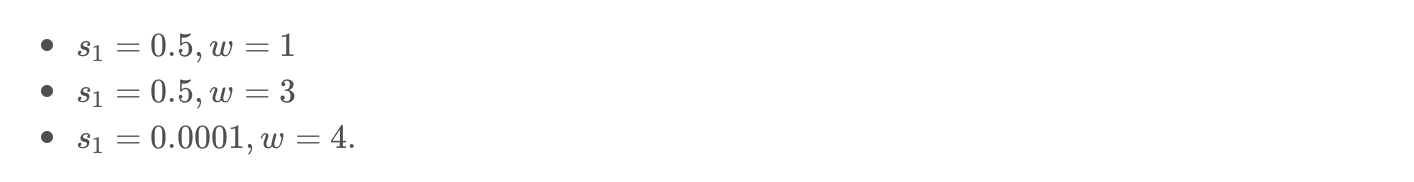
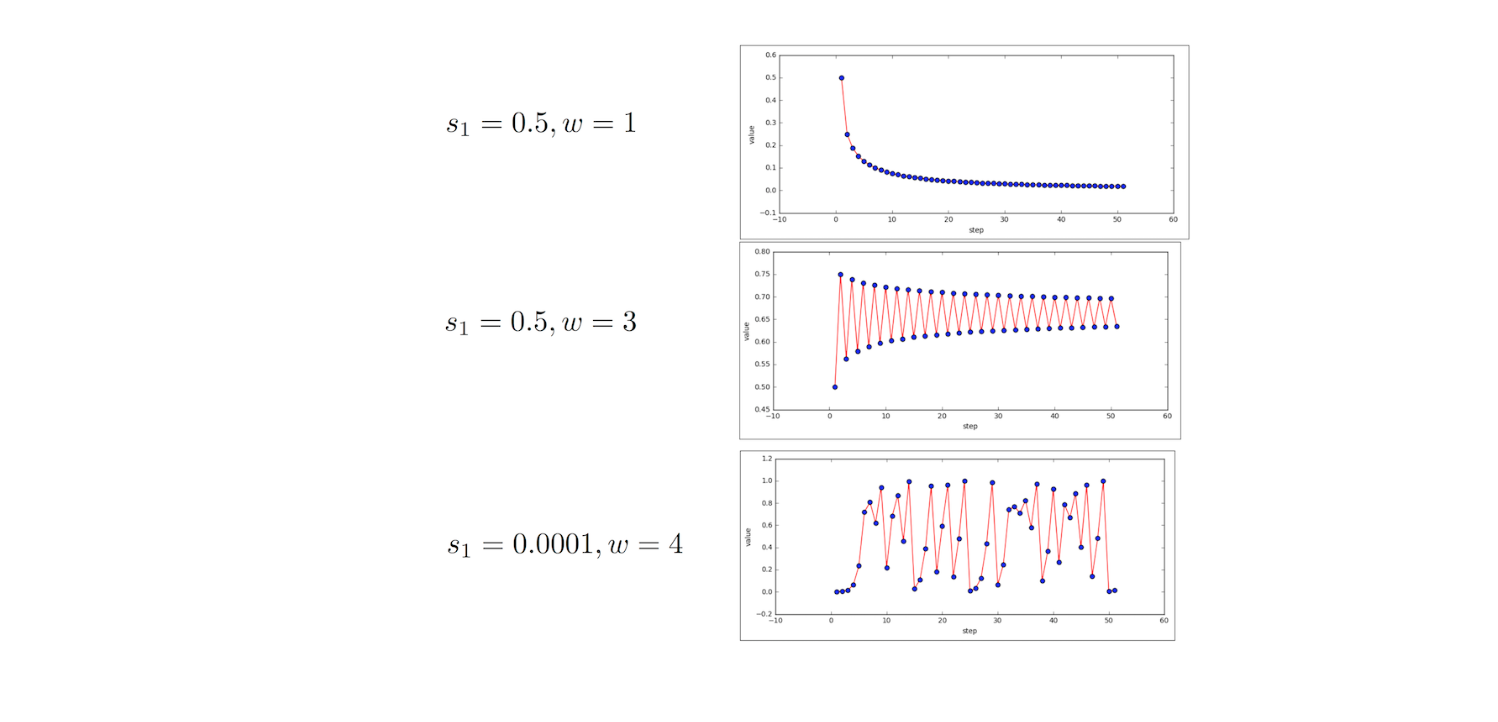

### Answer:

1. First we will try linear architecture (function)
2. Next element of sequence depends on previous element.
3. So, window = 1
4. Minimize loss
5. Test regression

In [21]:
from keras.models import Sequential
from keras.layers import Dense

window = 1

model = Sequential()
model.add(Dense(1, input_dim=window, activation="linear"))
model.compile(loss="mean_squared_error", optimizer="adam")

Using TensorFlow backend.


## Generate data

In [3]:
# define function template
def f(x, w):
    return w*x - w*x*x

In [63]:
import numpy as np
def f1(x1, w, depth=0, max_depth=1000):
    if depth < max_depth:
        x, y = f1(f(x1, w), w, depth + 1, max_depth)
        return np.append(x,x1), np.append(y,x[-1])
    return np.array([f(x1, w)]), np.array([x1])

#### Case: s1 = 0.5, w = 1

In [125]:
x_train, y_train = f1(0.5, 1)
x_train=x_train[::-1]
y_train=y_train[::-1]
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_train ", x_train[:3])
print("y_train", y_train[:3])

x_train shape:  (1001,)
y_train shape:  (1001,)
x_train  [ 0.5     0.25    0.1875]
y_train [ 0.25        0.1875      0.15234375]


In [126]:
model.fit(x_train, y_train, epochs=1000, batch_size=32, verbose=0)

In [127]:
print(x_train[:3])

[ 0.5     0.25    0.1875]


In [128]:
x_predict = model.predict(x_train[:50], batch_size=32, verbose=0)

In [30]:
import matplotlib.pyplot as plt

def plot(x_train, x_predict, points = 50):
    plt.plot(range(len(x_train[:points])), x_train[:points], marker='o', color='b', label='train')
    plt.plot(range(len(x_predict[:points])), x_predict[:points], marker='x', color='r', label='predicted')
    plt.xlabel('step')
    plt.ylabel('value')
    plt.legend()
    plt.show()

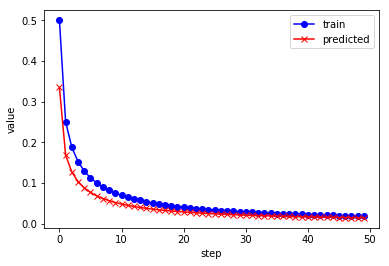

In [129]:
plot(x_train, x_predict)

#### Case: s1 = 0.5, w = 3

In [42]:
x_train, y_train = f1(0.5, 3)
x_train=x_train[::-1]
y_train=y_train[::-1]
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_train", x_train[:5])
print("y_train", y_train[:5])

x_train shape:  (1001,)
y_train shape:  (1001,)
x_train [ 0.5         0.75        0.5625      0.73828125  0.57966614]
y_train [ 0.75        0.5625      0.73828125  0.57966614  0.73095992]


In [43]:
model.fit(x_train, y_train, epochs=1000, batch_size=32, verbose=0)

In [46]:
x_predict = model.predict(x_train[:50], batch_size=32, verbose=0)

In [47]:
print(x_train[:5])
print(x_predict[:5])

[ 0.5         0.75        0.5625      0.73828125  0.57966614]
[[ 0.82179922]
 [ 0.5876416 ]
 [ 0.76325983]
 [ 0.59861779]
 [ 0.74718148]]


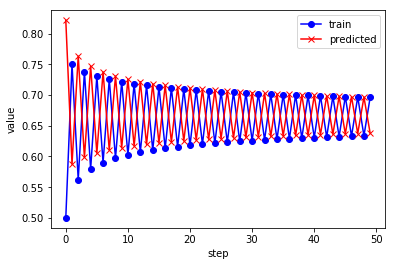

In [48]:
plot(x_train, x_predict)

#### Case: s1 = 0.0001, w = 4

In [102]:
import sys
sys.setrecursionlimit(20000)
x_train, y_train = f1(0.0001, 4, max_depth=1000)
x_train=x_train[::-1]
y_train=y_train[::-1]
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print(x_train[:3])
print(y_train[:3])

x_train shape:  (1001,)
y_train shape:  (1001,)
[ 0.0001      0.00039996  0.0015992 ]
[ 0.00039996  0.0015992   0.00638657]


In [119]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.normalization import BatchNormalization
from keras import optimizers
window = 1

model = Sequential()
model.add(Dense(1, input_dim=window, activation="linear"))
model.compile(loss="mean_squared_error", optimizer=optimizers.Adam(lr=0.01))

In [120]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='min')
checkpoint = ModelCheckpoint("best_model_case3.hdf5", monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='auto')

model.fit(x_train, y_train, epochs=1000, batch_size=10, callbacks=[checkpoint, early_stop], validation_split=.2, verbose=0)

In [121]:
model.load_weights("best_model_case3.hdf5")
model.compile(loss="mean_squared_error", optimizer="adam")

In [122]:
print(x_train[:5])
print(x_predict[:5])

[ 0.0001      0.00039996  0.0015992   0.00638657  0.02538313]
[[ 0.13708314]
 [ 0.13708314]
 [ 0.13708314]
 [ 0.13708314]
 [ 0.13708314]]


In [123]:
x_predict = model.predict(x_train[:50], batch_size=32, verbose=0)
print(x_predict[:5])

[[ 0.50976419]
 [ 0.5097729 ]
 [ 0.50980783]
 [ 0.50994718]
 [ 0.51050025]]


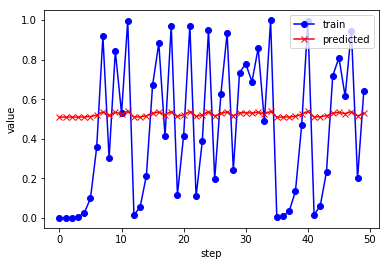

In [124]:
plot(x_train, x_predict)